In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
# y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
y = (2*X+4).reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


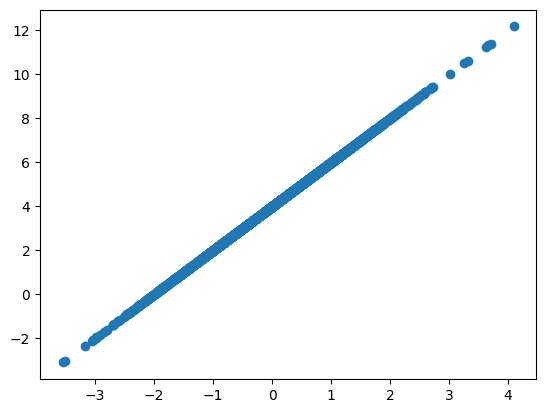

In [95]:
plt.scatter(X,y)
plt.show()

In [35]:
def hypothesis(x,w,w0):
    # ypred = []
    # for r in range(x.shape[0]):
    #     yp = w0 + np.sum(w * x[r])
    #     # for f in range(x.shape[1]):
    #     #     yp += w[f]*x[r,f]
    #     ypred.append(yp)
    # ypred = np.sum(x*w,axis = 1)+w0
    return x@w + w0

In [36]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],10)

array([14, 17, 20, 23])

In [40]:
w = [2]
w0 = 1

In [38]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [41]:
loss(X,w,w0,y)

6262.785551671269

In [68]:
def gradientDescent(X,y,lr = 0.01,epochs = 100):
    w = np.random.random(size=(X.shape[1],))
    w0 = 1
    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        # grads = []
        # for j in range(X.shape[1]):
        #     # g = 0
        #     # for i in range(X.shape[0]):
        #     #     g += (ypred[i]-y[i])*X[i,j]

        #     # g /= X.shape[0]
        #     grads.append(np.mean((ypred - y)*X[:,j]))

        grads = (ypred-y)@X/X.shape[0]
        w = w - lr*np.array(grads)
        w0 = w0 - lr*np.mean(ypred-y)

    return w,w0


In [69]:
w,w0 = gradientDescent(X,y,lr = 0.05,epochs=10000)

In [70]:
w

array([80.54363185])

In [71]:
w0

3.727988284452725

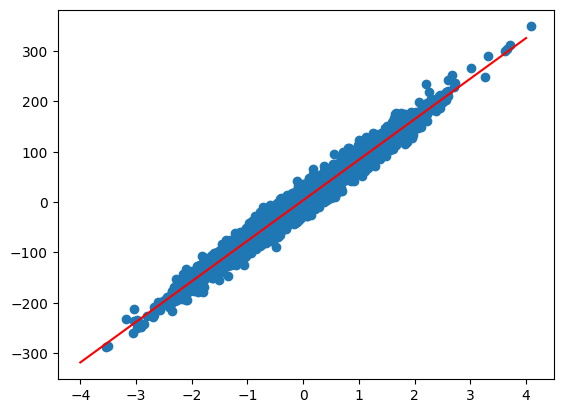

In [73]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [77]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            
            # i = np.random.randint(X.shape[0])
            # grads = (ypred[i]-y[i])*X[i]
            
            grads = grads = (ypred-y)@X/X.shape[0]
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [96]:
clf = LinearRegression()
clf.fit(X,y,epochs=500)

In [104]:
clf.w

array([1.98169443])

In [105]:
clf.w0

3.977303245161423

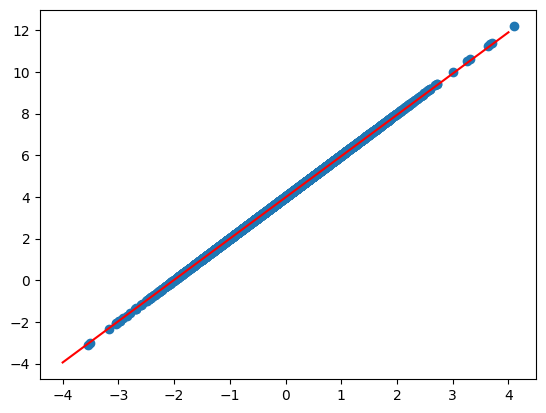

In [97]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,clf.predict(x),c='r')
plt.show()

In [98]:
clf.loss_e

[12.489069760872692,
 12.250143335565465,
 12.015790111949572,
 11.78592250844054,
 11.5604546217027,
 11.339302194470612,
 11.122382583987932,
 10.909614731051775,
 10.700919129651009,
 10.496217797187038,
 10.29543424526594,
 10.098493451050913,
 9.905321829164377,
 9.71584720412907,
 9.529998783337872,
 9.347707130542165,
 9.168904139848795,
 8.993523010215862,
 8.821498220437753,
 8.652765504610054,
 8.48726182806511,
 8.32492536376919,
 8.165695469172418,
 8.009512663502766,
 7.856318605495592,
 7.70605607155035,
 7.55866893430629,
 7.414102141629096,
 7.272301696000565,
 7.133214634303626,
 6.996789007995062,
 6.862973863658528,
 6.731719223930568,
 6.60297606879244,
 6.47669631722077,
 6.352832809190116,
 6.231339288020702,
 6.1121703830646945,
 5.995281592724538,
 5.88062926779694,
 5.768170595136304,
 5.657863581631447,
 5.5496670384896,
 5.4435405658217935,
 5.339444537523844,
 5.237340086447281,
 5.137189089854618,
 5.03895415515356,
 4.942598605904745,
 4.84808646809781,
 4

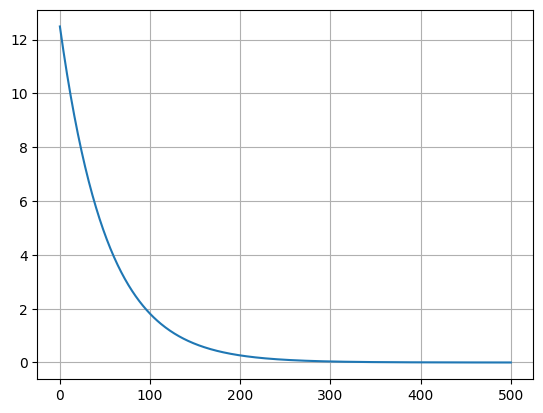

In [100]:
plt.plot(clf.loss_e)
plt.grid()
plt.show()

In [71]:
r2_score(y_test,clf.predict(x_test))

0.9704421421646653

In [110]:
Xnew = np.stack([X[:,0],np.ones(X.shape[0])],axis=1)
Xnew

array([[-0.28930742,  1.        ],
       [-0.58880963,  1.        ],
       [ 1.02750749,  1.        ],
       ...,
       [-0.30516366,  1.        ],
       [ 1.67583291,  1.        ],
       [-0.49175724,  1.        ]])

In [111]:
w = np.linalg.inv(Xnew.T@Xnew)@Xnew.T@y

In [112]:
w

array([2., 4.])

In [54]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [55]:
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

In [56]:
clf.coef_

array([ 0.        , 79.90573694])

In [57]:
clf.intercept_

0.6838689680155964